In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV

from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve, auc
import os
import matplotlib.pyplot as plt

pd.set_option('display.max_columns',None)

## 1. Problem definition

- Banks earn a major revenue from lending loans. But it is often associated with risk. The borrower's may default on the loan. To mitigate this issue, the banks have decided to use Machine Learning to overcome this issue. They have collected past data on the loan borrowers and we would like to develop a strong ML Model to classify if any new borrower is likely to default or not.
- The dataset is enormous & consists of multiple deteministic factors like borrowe's income, gender, loan pupose etc. The dataset is subject to strong multicollinearity & empty values. We are supposed to overcome these factors & build a strong classifier to predict defaulters?

## 2. Data Collection

We consider predicting the Default Status result: 1 for a defaulting client and 0 for a non-defaulting client. Thus we will use the "Status" as the y or "target" value in our study and the other columns (types of loan, gender, etc) as our x or "feature" values. Our goal is to build a model to be able to predict the "Status" (y) given a new set of data following our features (x).

In [2]:
# from https://www.kaggle.com/yasserh/loan-default-dataset
data_copy = pd.read_csv("Loan_Default.csv")
data = data_copy
data

,ID,year,loan_limit,Gender,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,open_credit,business_or_commercial,loan_amount,rate_of_interest,Interest_rate_spread,Upfront_charges,term,Neg_ammortization,interest_only,lump_sum_payment,property_value,construction_type,occupancy_type,Secured_by,total_units,income,credit_type,Credit_Score,co-applicant_credit_type,age,submission_of_application,LTV,Region,Security_Type,Status,dtir1
0,24890,2019,cf,Sex Not Available,nopre,type1,p1,l1,nopc,nob/c,116500,NaN,NaN,NaN,360.0,not_neg,not_int,not_lpsm,118000.0,sb,pr,home,1U,1740.0,EXP,758,CIB,25-34,to_inst,98.728814,south,direct,1,45.0
1,24891,2019,cf,Male,nopre,type2,p1,l1,nopc,b/c,206500,NaN,NaN,NaN,360.0,not_neg,not_int,lpsm,NaN,sb,pr,home,1U,4980.0,EQUI,552,EXP,55-64,to_inst,NaN,North,direct,1,NaN
2,24892,2019,cf,Male,pre,type1,p1,l1,nopc,nob/c,406500,4.560,0.2000,595.00,360.0,neg_amm,not_int,not_lpsm,508000.0,sb,pr,home,1U,9480.0,EXP,834,CIB,35-44,to_inst,80.019685,south,direct,0,46.0
3,24893,2019,cf,Male,nopre,type1,p4,l1,nopc,nob/c,456500,4.250,0.6810,NaN,360.0,not_neg,not_int,not_lpsm,658000.0,sb,pr,home,1U,11880.0,EXP,587,CIB,45-54,not_inst,69.376900,North,direct,0,42.0
4,24894,2019,cf,Joint,pre,type1,p1,l1,nopc,nob/c,696500,4.000,0.3042,0.00,360.0,not_neg,not_int,not_lpsm,758000.0,sb,pr,home,1U,10440.0,CRIF,602,EXP,25-34,not_inst,91.886544,North,direct,0,39.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148665,173555,2019,cf,Sex Not Available,nopre,type1,p3,l1,nopc,nob/c,436500,3.125,0.2571,9960.00,180.0,not_neg,not_int,not_lpsm,608000.0,sb,pr,home,1U,7860.0,CIB,659,EXP,55-64,to_inst,71.792763,south,direct,0,48.0
148666,173556,2019,cf,Male,nopre,type1,p1,l1,nopc,nob/c,586500,5.190,0.8544,0.00,360.0,not_neg,not_int,not_lpsm,788000.0,sb,ir,home,4U,7140.0,CIB,569,CIB,25-34,not_inst,74.428934,south,direct,0,15.0
148667,173557,2019,cf,Male,nopre,type1,p4,l1,nopc,nob/c,446500,3.125,0.0816,1226.64,180.0,not_neg,not_int,not_lpsm,728000.0,sb,pr,home,1U,6900.0,CIB,702,EXP,45-54,not_inst,61.332418,North,direct,0,49.0
148668,173558,2019,cf,Female,nopre,type1,p4,l1,nopc,nob/c,196500,3.500,0.5824,4323.33,180.0,not_neg,not_int,not_lpsm,278000.0,sb,pr,home,1U,7140.0,EXP,737,EXP,55-64,to_inst,70.683453,North,direct,0,29.0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148670 entries, 0 to 148669
Data columns (total 34 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   ID                         148670 non-null  int64  
 1   year                       148670 non-null  int64  
 2   loan_limit                 145326 non-null  object 
 3   Gender                     148670 non-null  object 
 4   approv_in_adv              147762 non-null  object 
 5   loan_type                  148670 non-null  object 
 6   loan_purpose               148536 non-null  object 
 7   Credit_Worthiness          148670 non-null  object 
 8   open_credit                148670 non-null  object 
 9   business_or_commercial     148670 non-null  object 
 10  loan_amount                148670 non-null  int64  
 11  rate_of_interest           112231 non-null  float64
 12  Interest_rate_spread       112031 non-null  float64
 13  Upfront_charges            10

## 3. Data Processing

In [4]:
data[data["Status"] == 1].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36639 entries, 0 to 148663
Data columns (total 34 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   ID                         36639 non-null  int64  
 1   year                       36639 non-null  int64  
 2   loan_limit                 35758 non-null  object 
 3   Gender                     36639 non-null  object 
 4   approv_in_adv              36398 non-null  object 
 5   loan_type                  36639 non-null  object 
 6   loan_purpose               36604 non-null  object 
 7   Credit_Worthiness          36639 non-null  object 
 8   open_credit                36639 non-null  object 
 9   business_or_commercial     36639 non-null  object 
 10  loan_amount                36639 non-null  int64  
 11  rate_of_interest           200 non-null    float64
 12  Interest_rate_spread       0 non-null      float64
 13  Upfront_charges            153 non-null    fl

In [5]:
# drop the columns with too much null values in Status == 1
data = data.drop(["rate_of_interest", "Interest_rate_spread", "Upfront_charges", "property_value", "LTV", "dtir1"], axis=1)

# drop the useless columns.
data = data.drop(["ID", "year"], axis=1)

# drop the lines with null values.
data = data.dropna(axis=0, how="any")

In [6]:
data.shape

(135108, 26)

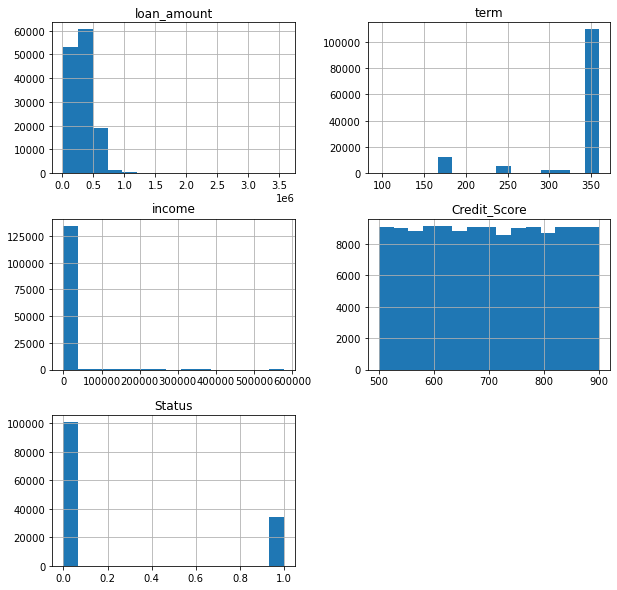

In [7]:
# check the distribution of numeric columns.
data.hist(bins=15, figsize=(10,10))
plt.show()

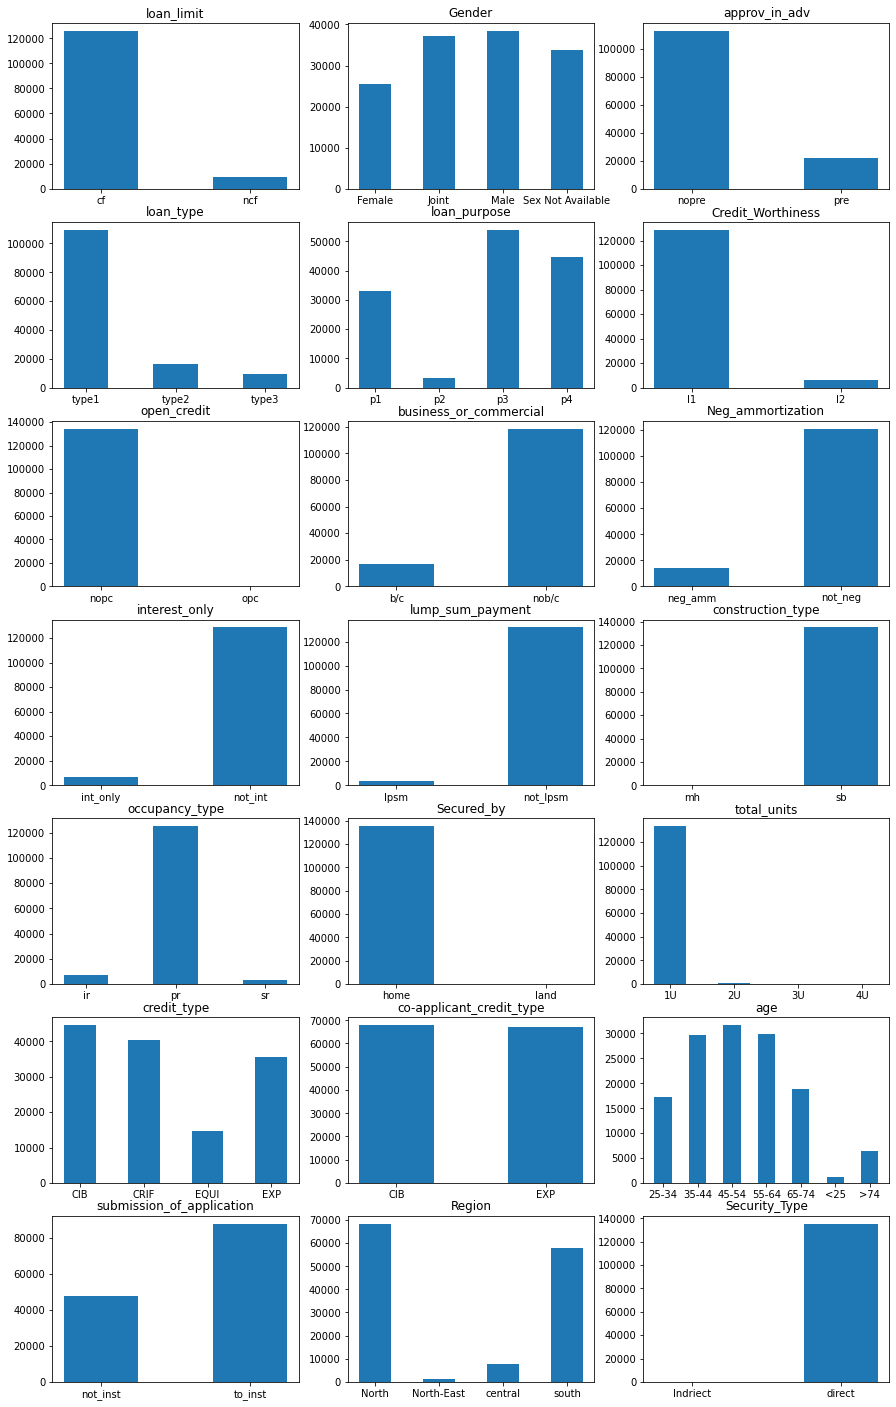

In [8]:
# check the distribution of non-numeric columns.
object_list = list(data.columns[data.dtypes == "object"])
fig = plt.figure(figsize=(15,25))
n = 1
for column in object_list:
    d = pd.DataFrame(data.loc[:, [column, "Status"]]).groupby(column).count()["Status"]
    ax = fig.add_subplot(7, 3, n)
    ax.bar(height=d, x=[i for i in range(len(d))], width = 0.5)
    ax.set_xticks([i for i in range(len(d))])
    ax.set_xticklabels(list(d.index))
    ax.set_title(column)
    n +=1
plt.show()

In [9]:
# drop the columns with extreme distributions
data = data.drop(["Security_Type", "total_units", "construction_type", "open_credit", "Secured_by", "income"], axis=1)

In [10]:
data.shape

(135108, 20)

In [11]:
# use one hot encoder
dummy_list = list(data.columns[data.dtypes == "object"])
for i in dummy_list:
    data = pd.concat([data, pd.get_dummies(data[i]).iloc[:, 1:]], axis=1)
    data.drop(i, axis=1, inplace=True)

In [12]:
# check the information of the data again.
data[data["Status"] == 1].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34227 entries, 0 to 148663
Data columns (total 35 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   loan_amount        34227 non-null  int64  
 1   term               34227 non-null  float64
 2   Credit_Score       34227 non-null  int64  
 3   Status             34227 non-null  int64  
 4   ncf                34227 non-null  uint8  
 5   Joint              34227 non-null  uint8  
 6   Male               34227 non-null  uint8  
 7   Sex Not Available  34227 non-null  uint8  
 8   pre                34227 non-null  uint8  
 9   type2              34227 non-null  uint8  
 10  type3              34227 non-null  uint8  
 11  p2                 34227 non-null  uint8  
 12  p3                 34227 non-null  uint8  
 13  p4                 34227 non-null  uint8  
 14  l2                 34227 non-null  uint8  
 15  nob/c              34227 non-null  uint8  
 16  not_neg            34

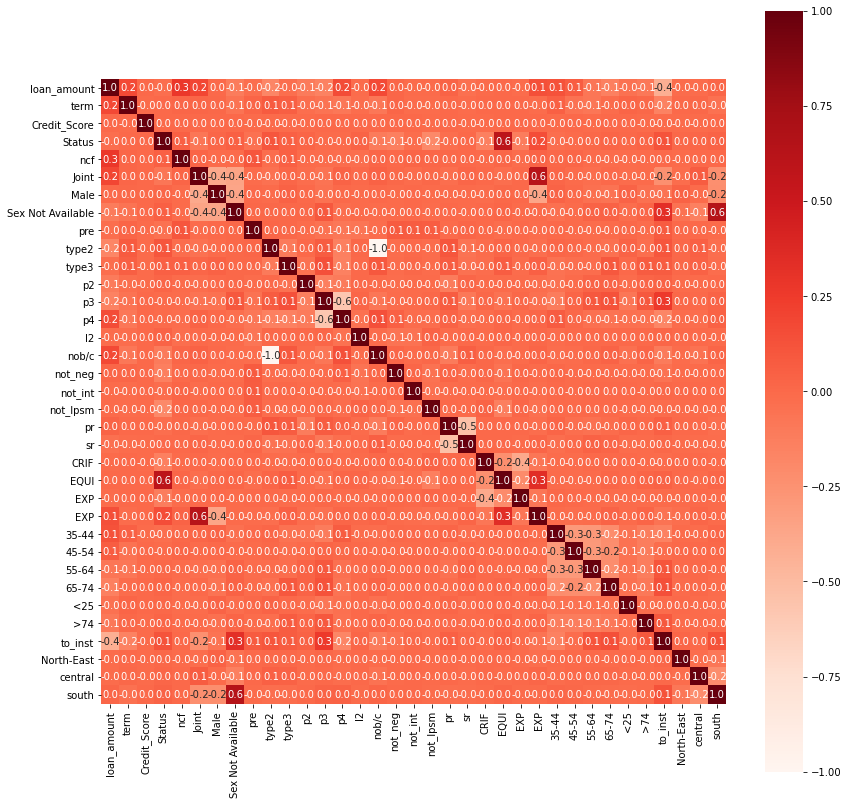

In [13]:
# find the correlation between columns.
corr = data.corr()
plt.figure(figsize=(14,14))
sns.heatmap(corr, annot=True, cmap='Reds',square=True, fmt=".1f") 
plt.show()

In [14]:
# drop the columns with correlations that are too high.
data = data.drop(["type2"], axis=1)

In [15]:
# Reselect data to make the it balance. 
status_1 = data[data["Status"] == 1]
status_0 = data[data["Status"] == 0].sample(len(status_1) * 2)
data_balanced = pd.concat([status_0, status_1, status_1], axis=0)
data_bal = data_balanced.sample(frac=1)

In [16]:
data_bal.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 136908 entries, 585 to 75472
Data columns (total 34 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   loan_amount        136908 non-null  int64  
 1   term               136908 non-null  float64
 2   Credit_Score       136908 non-null  int64  
 3   Status             136908 non-null  int64  
 4   ncf                136908 non-null  uint8  
 5   Joint              136908 non-null  uint8  
 6   Male               136908 non-null  uint8  
 7   Sex Not Available  136908 non-null  uint8  
 8   pre                136908 non-null  uint8  
 9   type3              136908 non-null  uint8  
 10  p2                 136908 non-null  uint8  
 11  p3                 136908 non-null  uint8  
 12  p4                 136908 non-null  uint8  
 13  l2                 136908 non-null  uint8  
 14  nob/c              136908 non-null  uint8  
 15  not_neg            136908 non-null  uint8  
 16  n

### Now we have balanced, cleaned and tidy data, ready to work with

In [17]:
# split the dataset into train set and test set.
X = data_bal.drop("Status", axis=1)
y = data_bal["Status"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15)

In [18]:
# scaler
scaler = MinMaxScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [19]:
# PCA principal component analysis
pca = PCA(n_components=33)
pca.fit(X_train)

PCA(n_components=33)

# 4.Model Selection and Visualisation

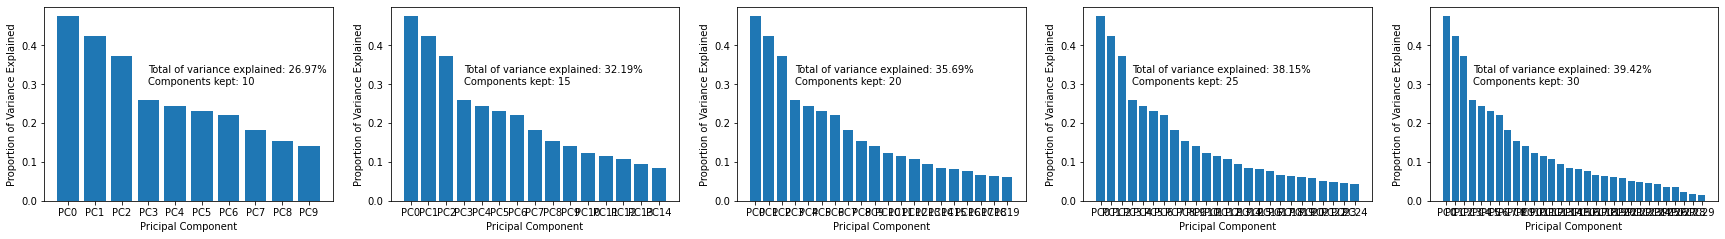

In [20]:
# testing PCA compenents range from 10 to 35
fig = plt.figure(figsize=(30, 25))
n=1

for j in range(10, 35, 5):
    var = pca.explained_variance_[0:j] # percentage of variance explained
    labels = [f'PC{i}' for i in range(len(var))]
    fig.add_subplot(6, 5, n)
    plt.bar(labels,var,)
    plt.xlabel('Pricipal Component')
    plt.ylabel('Proportion of Variance Explained')
    plt.text(3, 0.3, f"Total of variance explained: {round(var.sum()*10, 2)}%\nComponents kept: {len(var)}", fontdict={"size": 10})
    n+=1
plt.show()

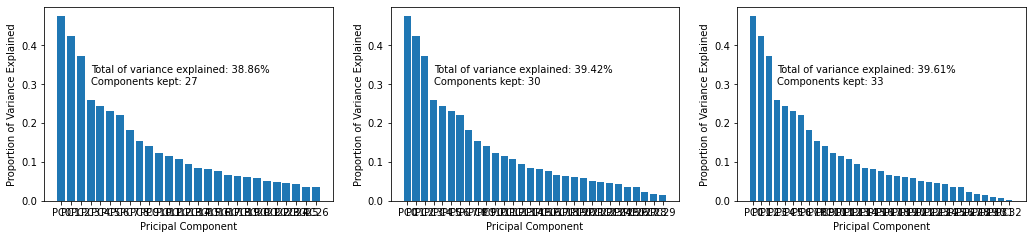

In [21]:
# testing PCA compenents range from 27 to 33

fig = plt.figure(figsize=(30, 25))
n=1

for j in range(27, 36, 3):
    var = pca.explained_variance_[0:j] # percentage of variance explained
    labels = [f'PC{i}' for i in range(len(var))]
    fig.add_subplot(6, 5, n)
    plt.bar(labels,var,)
    plt.xlabel('Pricipal Component')
    plt.ylabel('Proportion of Variance Explained')
    plt.text(3, 0.3, f"Total of variance explained: {round(var.sum()*10, 2)}%\nComponents kept: {len(var)}", fontdict={"size": 10})
    n+=1
plt.show()

### Here we observe that after 25 the gain in variance explained becomes to fall under 1% so for over 8 components the model won't get much more information, thus we will select only the first 25 components sorted by PCA

In [22]:
pca = PCA(n_components=25)
pca.fit(X_train)

X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

In [23]:
# using native cross-validation in the LogisticRegressionCV method from sci-kit learn

LGR_cv = LogisticRegressionCV(cv=5, random_state=0)
LGR_cv.fit(X_train_pca,y_train)
predictions = LGR_cv.predict(X_test_pca)
y_score = LGR_cv.decision_function(X_test_pca)

In [24]:
cm = confusion_matrix(y_test, predictions)

LGR_TN, LGR_FP, LGR_FN, LGR_TP = confusion_matrix(y_test, predictions).ravel()

print('True Positive(TP)  = ', LGR_TP)
print('False Positive(FP) = ', LGR_FP)
print('True Negative(TN)  = ', LGR_TN)
print('False Negative(FN) = ', LGR_FN)

LGR_accuracy =  (LGR_TP+LGR_TN) / (LGR_TP+LGR_FP+LGR_TN+LGR_FN)
LGR_f1 = round(f1_score(y_test, predictions),3)

print('Accuracy of the binary classification = {:0.3f}'.format(LGR_accuracy))
print(f'F1 score of the binary classification = {LGR_f1}')

True Positive(TP)  =  6196
False Positive(FP) =  1293
True Negative(TN)  =  9033
False Negative(FN) =  4015
Accuracy of the binary classification = 0.742
F1 score of the binary classification = 0.7


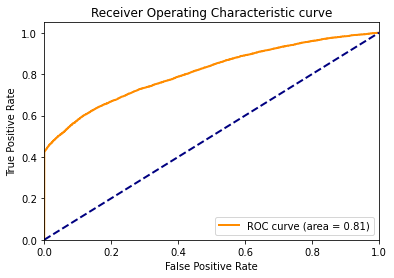

In [25]:
fpr, tpr, _ = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)

plt.figure()
lw = 2
plt.plot(
    fpr,
    tpr,
    color="darkorange",
    lw=lw,
    label="ROC curve (area = %0.2f)" % roc_auc,
)
plt.plot([0, 1], [0, 1], color="navy", lw=lw, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic curve")
plt.legend(loc="lower right")
plt.show()

# Second Method : Weighted SVM

In [26]:
# Retrieving unbalanced data from the cleaned dataset
data_unbal = data

In [27]:
# Check for unbalance
len(data_unbal[data_unbal["Status"]==1]), len(data_unbal[data_unbal["Status"]==0])

(34227, 100881)

In [28]:
X = data_unbal.drop("Status", axis=1)
y = data_unbal["Status"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15) #split dataset

stdScaler = StandardScaler()
stdScaler.fit(X_train) 

X_train = stdScaler.transform(X_train) #scale the data for better computations and normalized dataset
X_test = stdScaler.transform(X_test)

clf = SGDClassifier() # auto-mode
GridSVC = GridSearchCV(SGDClassifier(), # use cross-validation selection method to prevent overfitting on a large training set
                       param_grid={'loss':["hinge"], 'random_state':[0]}, #SVM has an auto-mode for weight computation in imbalanced dataset
                       verbose=1, 
                       cv=5,
                       n_jobs = -1)

GridSVC.fit(X_train, y_train)
SVCpred = GridSVC.predict(X_test)
y_score_svc = GridSVC.decision_function(X_test)

Fitting 5 folds for each of 1 candidates, totalling 5 fits


In [29]:
# Build model results

cm = confusion_matrix(y_test, SVCpred)

SVM_TN, SVM_FP, SVM_FN, SVM_TP = confusion_matrix(y_test, SVCpred).ravel()

print('True Positive(TP)  = ', SVM_TP)
print('False Positive(FP) = ', SVM_FP)
print('True Negative(TN)  = ', SVM_TN)
print('False Negative(FN) = ', SVM_FN)

SVM_accuracy = (SVM_TP+SVM_TN) / (SVM_TP+SVM_FP+SVM_TN+SVM_FN)
SVM_F1 = round(f1_score(y_test, SVCpred),3)

print('Accuracy of the binary classification = {:0.3f}'.format(SVM_accuracy))
print(f'F1 score of the binary classification = {SVM_F1}')

True Positive(TP)  =  2346
False Positive(FP) =  101
True Negative(TN)  =  15046
False Negative(FN) =  2774
Accuracy of the binary classification = 0.858
F1 score of the binary classification = 0.62


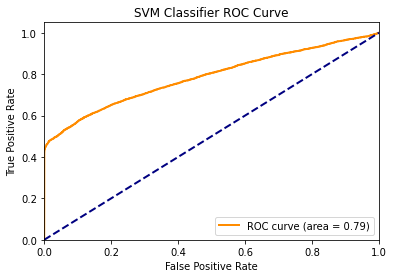

In [30]:
fpr, tpr, _ = roc_curve(y_test, y_score_svc)
roc_auc = auc(fpr, tpr)

plt.figure()
lw = 2
plt.plot(
    fpr,
    tpr,
    color="darkorange",
    lw=lw,
    label="ROC curve (area = %0.2f)" % roc_auc,
)
plt.plot([0, 1], [0, 1], color="navy", lw=lw, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("SVM Classifier ROC Curve")
plt.legend(loc="lower right")
plt.show()

### The ROC curve is not perfect as well, but isn't bad compared to the previous model

# 5. Summary and Result explanation

In [31]:
LGR_TOT = LGR_TP + LGR_FN + LGR_FP + LGR_TN
SVM_TOT = SVM_TP + SVM_FN + SVM_FP + SVM_TN
def rate(num,tot):
    return round(num/tot*100,2)

new_line = os.linesep
confMatrix = pd.DataFrame([[f'{LGR_TP} / {rate(LGR_TP,LGR_TOT)}%', f'{LGR_FN} / {rate(LGR_FN,LGR_TOT)}%', f'{SVM_TP} / {rate(SVM_TP,SVM_TOT)}%', f'{SVM_FN} / {rate(SVM_FN,SVM_TOT)}%'],
                           [f'{LGR_FP} / {rate(LGR_FP,LGR_TOT)}%', f'{LGR_TN} / {rate(LGR_TN,LGR_TOT)}%', f'{SVM_FP} / {rate(SVM_FP,SVM_TOT)}%', f'{SVM_TN} / {rate(SVM_TN,SVM_TOT)}%']],
                  index=pd.Index(['Default (Positive)', 'Non-Default (Negative)'], name='Actual Label:'),
                  columns=pd.MultiIndex.from_product([['Logistic Regression', 'Support Vector Classifier'],['Default', 'Non-Default']], names=['Model:', 'Predicted:']))

display(confMatrix)
print(f"LGR accuracy: {LGR_accuracy}    SVC accuracy: {SVM_accuracy}\nLGR F1 score: {LGR_f1}                 SVC F1 score: {SVM_F1}")

Model:                 Logistic Regression                 \
Predicted:                         Default    Non-Default   
Actual Label:                                               
Default (Positive)           6196 / 30.17%  4015 / 19.55%   
Non-Default (Negative)         1293 / 6.3%  9033 / 43.98%   

Model:                 Support Vector Classifier                  
Predicted:                               Default     Non-Default  
Actual Label:                                                     
Default (Positive)                 2346 / 11.58%   2774 / 13.69%  
Non-Default (Negative)                101 / 0.5%  15046 / 74.24%

LGR accuracy: 0.7415396601256269    SVC accuracy: 0.8581437805299255
LGR F1 score: 0.7                 SVC F1 score: 0.62


### Comparing the two models we can see SVC performs better on accuracy but less on F1 score, meaning that, overall, SVC will perform better but will have issues predicting the minor class: 1 (defaulters). Though it will almost never mistake a true negative as a false positive so it has very high performance on the other class.

In [32]:
coefs = pd.DataFrame(
   sorted(GridSVC.best_estimator_.coef_.reshape(-1,1)),
   columns=['Coefficients'], index=X.columns
)


coefs

,Coefficients
loan_amount,-0.335659
term,-0.060819
Credit_Score,-0.059035
ncf,-0.020409
Joint,-0.019860
Male,-0.016687
Sex Not Available,-0.015867
pre,-0.015638
type3,-0.013307
p2,-0.012803


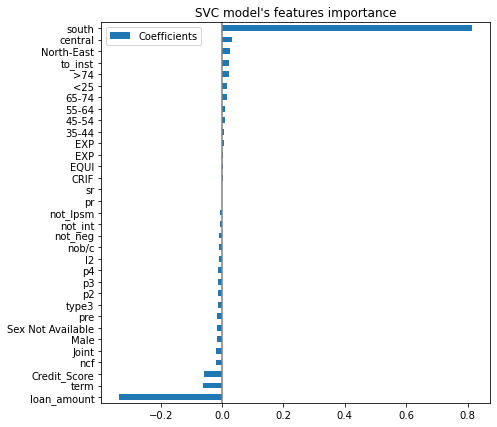

In [33]:
coefs = pd.DataFrame(
   coefs,
   columns=['Coefficients'], index=X.columns
)

coefs.plot(kind='barh', figsize=(9, 7))
plt.title("SVC model's features importance")
plt.axvline(x=0, color='.5')
plt.subplots_adjust(left=.3)

In [34]:
status_num = list((len(data_copy["Region"].loc[data_copy["Status"]==1]), len(data_copy["Region"].loc[data_copy["Status"]==0])))
south_num = list((len(data_copy[data_copy["Region"]=="south"].loc[data_copy["Status"]==1]), len(data_copy[data_copy["Region"]=="south"].loc[data_copy["Status"]==0])))
central_num = list((len(data_copy[data_copy["Region"]=="central"].loc[data_copy["Status"]==1]), len(data_copy[data_copy["Region"]=="central"].loc[data_copy["Status"]==0])))
North_east_num = list((len(data_copy[data_copy["Region"]=="North-East"].loc[data_copy["Status"]==1]), len(data_copy[data_copy["Region"]=="Nort-East"].loc[data_copy["Status"]==0])))
regions_cases_df = pd.DataFrame(data=[status_num,south_num, central_num, North_east_num], index=["whole", "south", "central", "North-East"], columns=["positive", "negative"])                  
regions_cases_df

,positive,negative
whole,36639,112031
south,17047,46969
central,2395,6302
North-East,376,0


### We observe the "south" category is overwhelming, maybe because the dataset was collected from the south. It corrupts our model by thinking it has a high impact on the results.

# Summary
## 1. We collected a pre-labeled dataset with 36639 rows and 34 columns. 

We consider predicting the Default Status result: 1 for a defaulting client and 0 for a non-defaulting client.
Thus we will use the "Status" as the y or "target" value in our study and the other columns (types of loan, gender, etc) as our x or "feature" values. Our goal is to build a model to be able to predict the "Status" (y) given a new set of data following our features (x).

## 2. Cleaning Data Progress
2-1 drop columns that are having too much null values or are useless in predicting. We drop all the lines with null values, <br/> making the data in 135108 rows and 20 columns left. <br/>
2-2 We use the one-hot encoding method to transform the object data <br/>
2-3 We use the heatmap to identify and drop the columns with coreelations that are too high. <br/>
2-4 We deal with the imbalance problem by doubling the data. <br/>

## 3. Model selection

### 3-1 Logistic Regression: 
3-1-1 We imply the PCA analysis method to narrow down the datasets for easier analyzing, and found the optimal component quantity is 25 because after increasing the number of components more,
the variance explained doesn't increase much so the model wouldn't get much information from more components <br/>
3-1-2 the accuracy of the LGR model is 0.740, area of AUC is 0.81. <br/>

### 3-2 Weighted SVM:
3-2-1 We scaled the data before analyzing for having comparable scales between the data and to make sure it is normalized. <br/>
3-2-2 the accuracy of the W-SVM model is 0.854, are of AUC is 0.71. <br/>

## 4. Analyze the model results
We found out that the most influencial variable is the "south" category from the "Region" feature according to the coefficients so it means
that changing this variable might have high impact on the SVM model's decision.
We believe it is not very satisfactory for explanation, because it could mean there is another bias in the data : maybe bankers in the south accept more loans and get more defaulted.
What we observe in the original dataset is that the "south" category is quite following the distribution of the dataset but is overrepresented: half of positive and half of negative values are from the south
while other categories might be sparsed for positive and negative status, so south has a high impact on the final decision. <br/>
So we can say our dataset is corrupted by its origin: it might have been gathered by a southern agency which mostly got local data and gathered less of national information. <br/>
If we drop the "region" feature then we might get a "region agnostic" model and that would be fine in term of explanatory analysis but actually we would also loose a lot of accuracy. Another way to address this issue would be to build a specific model for the south data, as it would be less corrupted but more specialized. Thus we believe it is not an interesting study for a bank's scale and a software solution using Machine Learning and big data would be too expensive to put in place, maintain and update in a local area. Plus, for corporate meaning, having only one part of their agencies using these models could create even more bias: if they have a better prediction on who is more likely to default, they might have less and less data on defaulting clients in a particular region (which is the initial goal of the bank) though it would make this dataset impossible to gather with a nationally-built one to be able to make national predictions, thus it is better to wait to be able to use national dataset for nationwide predictions.